<a href="https://colab.research.google.com/github/ucfilho/ANN/blob/master/ANN_2022/Image_07/class_007_image_processing_cats_002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import pandas as pd
import random
import zipfile
from matplotlib import pyplot as plt
import skimage.feature
from string import digits
import seaborn as sns
import skimage
import tensorflow as tf
from sklearn.model_selection import train_test_split
from imageio import imread

In [2]:
!git clone https://github.com/ucfilho/Machine_Learning_DataSet
%cd Machine_Learning_DataSet

fatal: destination path 'Machine_Learning_DataSet' already exists and is not an empty directory.
/content/Machine_Learning_DataSet


In [3]:
# check: https://pythontutorials.eu/deep-learning/transfer-learning/#

In [4]:
FILE='cats.zip'
archive = zipfile.ZipFile(FILE, 'r')
archive.extractall()

In [5]:
archive = zipfile.ZipFile(FILE, 'r')
archive.extractall()

In [6]:
img_name=[]
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)

In [7]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

data = np.empty((40, 224, 224, 3))

for i in range(0, 20):
    if('jpg' in img_name[i]):
      im = cv2.imread(img_name[i])
      im = cv2.resize(im, (224, 224))
      im = preprocess_input(im)
      if(max(im.flatten())>1):
        im = im/max(im.flatten())
      data[i] = im

for i in range(0, 20):
    if('jpg' in img_name[i+20]):
      im = np.array(cv2.imread(img_name[i+20]))
      im = cv2.resize(im,(224, 224))
      im = preprocess_input(im)
      if(max(im.flatten())>1):
        im = im/max(im.flatten())
      data[i + 20] = im

labels = np.empty(40, dtype=int)
labels[:20] = 0
labels[20:] = 1

In [8]:
data.shape

(40, 224, 224, 3)

In [9]:
from keras.applications.mobilenet_v2 import MobileNetV2

#model = MobileNetV2(weights='imagenet')

In [10]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

In [11]:
# The first 15 images for male and female cats will be used for training
training_data = np.empty((30, 224, 224, 3))
training_data[:15] = data[:15]
training_data[15:] = data[20:35]
training_labels = np.empty(30)
training_labels[:15] = 0
training_labels[15:] = 1
# The last 5 images for male and female cats will be used for validation
validation_data = np.empty((10, 224, 224, 3))
validation_data[:5] = data[15:20]
validation_data[5:] = data[35:]
validation_labels = np.empty(10)
validation_labels[:5] = 0
validation_labels[5:] = 1

In [12]:
training_labels.shape

(30,)

In [13]:
from keras.applications.mobilenet_v2 import MobileNetV2
model = MobileNetV2(weights='imagenet')

In [14]:
cat_output2 = Dense(1, activation= 'sigmoid') #'relu')
cat_output2 = cat_output2(model.layers[-2].output)
cat_input2 = model.input
cat_model2 = Model(inputs=cat_input2, outputs=cat_output2)
for layer in cat_model2.layers[:-1]:
    layer.trainable = False

In [15]:
'''# Create the model
model = Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))'''

"# Create the model\nmodel = Sequential()\n \n# Add the vgg convolutional base model\nmodel.add(vgg_conv)\n \n# Add new layers\nmodel.add(Flatten())\nmodel.add(Dense(1024, activation='relu'))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(3, activation='softmax'))"

In [16]:
base_learning_rate = 0.0001
cat_model2.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [17]:
r = cat_model2.fit(
    x=training_data,
    y=training_labels,
    validation_data=(validation_data, validation_labels),
    epochs=400,
    verbose=2
)

Epoch 1/400


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1/1 - 11s - loss: 0.9489 - accuracy: 0.5000 - val_loss: 0.8458 - val_accuracy: 0.5000 - 11s/epoch - 11s/step
Epoch 2/400
1/1 - 2s - loss: 0.9189 - accuracy: 0.4667 - val_loss: 0.8196 - val_accuracy: 0.5000 - 2s/epoch - 2s/step
Epoch 3/400
1/1 - 1s - loss: 0.8990 - accuracy: 0.4667 - val_loss: 0.7996 - val_accuracy: 0.5000 - 1s/epoch - 1s/step
Epoch 4/400
1/1 - 1s - loss: 0.8833 - accuracy: 0.4667 - val_loss: 0.7831 - val_accuracy: 0.5000 - 1s/epoch - 1s/step
Epoch 5/400
1/1 - 1s - loss: 0.8702 - accuracy: 0.4667 - val_loss: 0.7690 - val_accuracy: 0.5000 - 1s/epoch - 1s/step
Epoch 6/400
1/1 - 1s - loss: 0.8586 - accuracy: 0.4667 - val_loss: 0.7566 - val_accuracy: 0.5000 - 1s/epoch - 1s/step
Epoch 7/400
1/1 - 1s - loss: 0.8483 - accuracy: 0.4667 - val_loss: 0.7456 - val_accuracy: 0.5000 - 1s/epoch - 1s/step
Epoch 8/400
1/1 - 1s - loss: 0.8389 - accuracy: 0.5000 - val_loss: 0.7357 - val_accuracy: 0.5000 - 1s/epoch - 1s/step
Epoch 9/400
1/1 - 1s - loss: 0.8303 - accuracy: 0.5000 - val_loss

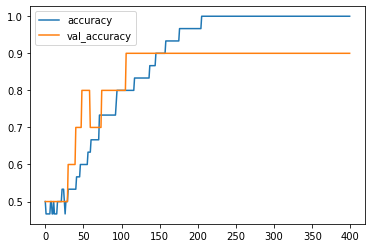

In [18]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

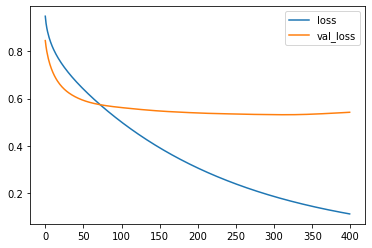

In [19]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()